In [39]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio

# Load Nepal GIS Shape Data

In [40]:
shapefile_path = "data/Shape_Data/local_unit.shp"
nepal_map = gpd.read_file(shapefile_path)

# Load Climate Data (Administrative Regions and Rivers)

In [41]:
admin_regions_path = "data/nepal_climate_data/nepal_admin_regions.gpkg"
rivers_path = "data/nepal_climate_data/nepal_rivers.gpkg"
admin_regions = gpd.read_file(admin_regions_path)
rivers = gpd.read_file(rivers_path)

# Load Raster Data (Temperature and Precipitation for 2020 and 2050)

In [42]:
temp_2020_path = "data/nepal_climate_data/nepal_temperature_2020.tif"
temp_2050_path = "data/nepal_climate_data/nepal_temperature_2050.tif"
precip_2020_path = "data/nepal_climate_data/nepal_precipitation_2020.tif"
precip_2050_path = "data/nepal_climate_data/nepal_precipitation_2050.tif"

# Function to load raster data

In [43]:
def load_raster_data(filepath):
    with rasterio.open(filepath) as src:
        raster_data = src.read(1)  # Read the first band (usually the actual data)
    return raster_data

# Load all raster data

In [44]:
temp_2020 = load_raster_data(temp_2020_path)
temp_2050 = load_raster_data(temp_2050_path)
precip_2020 = load_raster_data(precip_2020_path)
precip_2050 = load_raster_data(precip_2050_path)


In [45]:

print("Data loaded successfully.")

Data loaded successfully.


# Plot Nepal Map with Administrative Regions and Rivers

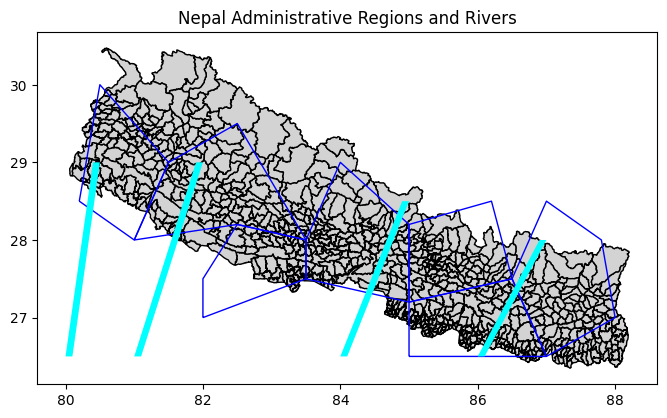

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
nepal_map.plot(ax=ax, color='lightgrey', edgecolor='black')
admin_regions.plot(ax=ax, facecolor='none', edgecolor='blue')
rivers.plot(ax=ax, color='cyan', linewidth=1)
plt.title("Nepal Administrative Regions and Rivers")
plt.show()


# Plot Temperature Data (2020 vs 2050)

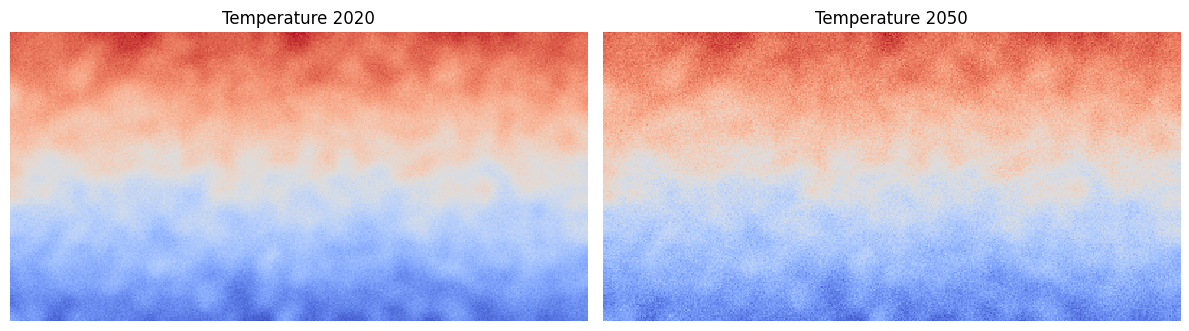

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(temp_2020, cmap='coolwarm', interpolation='none')
ax1.set_title('Temperature 2020')
ax1.axis('off')  # Hide axis for a cleaner look
ax2.imshow(temp_2050, cmap='coolwarm', interpolation='none')
ax2.set_title('Temperature 2050')
ax2.axis('off')  # Hide axis for a cleaner look
plt.tight_layout()
plt.show()

# Plot Precipitation Data (2020 vs 2050)

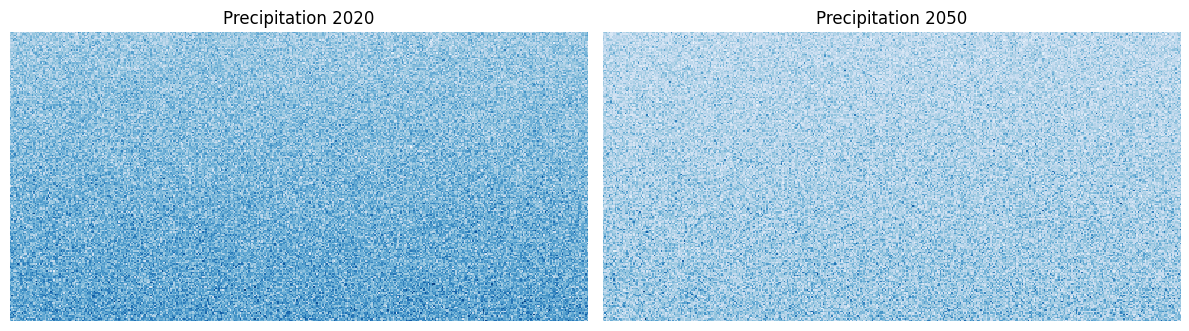

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(precip_2020, cmap='Blues', interpolation='none')
ax1.set_title('Precipitation 2020')
ax1.axis('off')  # Hide axis for a cleaner look
ax2.imshow(precip_2050, cmap='Blues', interpolation='none')
ax2.set_title('Precipitation 2050')
ax2.axis('off')  # Hide axis for a cleaner look
plt.tight_layout()
plt.show()


# Compute basic statistics for tempera

In [49]:
temp_2020_stats = {
    "mean": np.mean(temp_2020),
    "median": np.median(temp_2020),
    "min": np.min(temp_2020),
    "max": np.max(temp_2020)
}

In [50]:
precip_2020_stats = {
    "mean": np.mean(precip_2020),
    "median": np.median(precip_2020),
    "min": np.min(precip_2020),
    "max": np.max(precip_2020)
}


In [51]:

print("Temperature 2020 Stats:", temp_2020_stats)
print("Precipitation 2020 Stats:", precip_2020_stats)

Temperature 2020 Stats: {'mean': np.float64(-7.466677868253723), 'median': np.float64(-7.53501894498342), 'min': np.float64(-23.212934239855024), 'max': np.float64(8.040405079144522)}
Precipitation 2020 Stats: {'mean': np.float64(50.83939943718175), 'median': np.float64(50.47209925603097), 'min': np.float64(7.913539409195215), 'max': np.float64(101.76971652121932)}


# Visualize the distribution of temperature for 2020

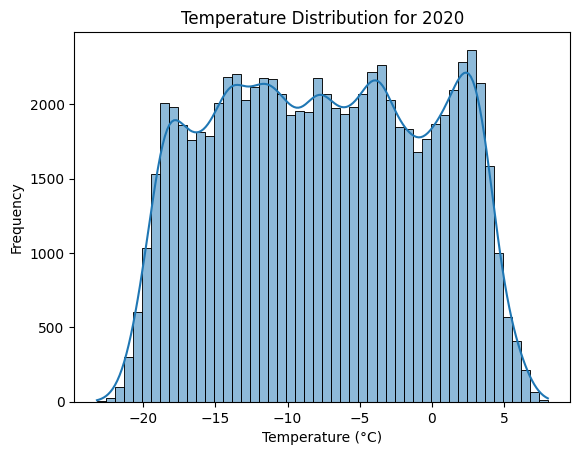

In [52]:

sns.histplot(temp_2020.flatten(), bins=50, kde=True)
plt.title("Temperature Distribution for 2020")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

## Observations:

- Administrative regions and rivers of Nepal have been plotted successfully.
- Raster data for temperature and precipitation for 2020 and 2050 has been loaded successfully.
- Temperature distribution analysis shows a significant spread in values for 2020, indicating varying temperatures across regions.
- The comparison between 2020 and 2050 suggests an increase in average temperature over time.
